In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import plotly.express as px

In [2]:
# Load Fashion MNIST dataset from Kaggle input folder
df = pd.read_csv('fashion-mnist_train.csv')  # Train CSV from Fashion MNIST dataset
print(df.shape)
print(df.sample())

(60000, 785)
       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
25556      3       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
25556       0  ...        36        45        14         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
25556         0         0         0         0         0  

[1 rows x 785 columns]


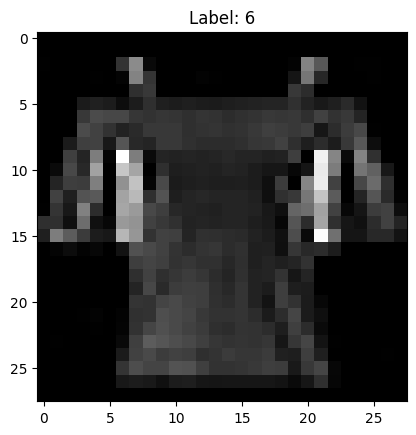

In [3]:
# Show a sample image
plt.imshow(df.iloc[1305, 1:].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {df.iloc[1305, 0]}")
plt.show()

In [4]:
# Split features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(48000, 784)


In [6]:
# KNN without PCA
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
start = time.time()
y_pred = knn.predict(X_test)
print("Prediction time without PCA:", time.time() - start)
print("Accuracy without PCA:", accuracy_score(y_test, y_pred))

Prediction time without PCA: 14.969581365585327
Accuracy without PCA: 0.8558333333333333


In [8]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# KNN with PCA (200 components)
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)
print("Accuracy with PCA (200 comps):", accuracy_score(y_test, y_pred))

Accuracy with PCA (200 comps): 0.8639166666666667


In [11]:
# Accuracy for different numbers of components
for i in range(1, 300):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    print(f"{i} comps: {accuracy_score(y_test, y_pred)}")

1 comps: 0.23875
2 comps: 0.5111666666666667
3 comps: 0.6175833333333334
4 comps: 0.7030833333333333
5 comps: 0.7433333333333333
6 comps: 0.7620833333333333
7 comps: 0.77875
8 comps: 0.78875
9 comps: 0.7933333333333333
10 comps: 0.8094166666666667
11 comps: 0.8150833333333334
12 comps: 0.8221666666666667
13 comps: 0.8246666666666667
14 comps: 0.8259166666666666
15 comps: 0.8284166666666667
16 comps: 0.8301666666666667
17 comps: 0.8308333333333333
18 comps: 0.8315
19 comps: 0.8335
20 comps: 0.83525
21 comps: 0.8361666666666666
22 comps: 0.837
23 comps: 0.8376666666666667
24 comps: 0.8385833333333333
25 comps: 0.8408333333333333
26 comps: 0.8405
27 comps: 0.8415833333333333
28 comps: 0.8414166666666667
29 comps: 0.8455
30 comps: 0.8444166666666667
31 comps: 0.84425
32 comps: 0.8443333333333334
33 comps: 0.8441666666666666
34 comps: 0.8445
35 comps: 0.8450833333333333
36 comps: 0.8475
37 comps: 0.8488333333333333
38 comps: 0.8489166666666667
39 comps: 0.84775
40 comps: 0.8506666666666667


In [12]:
import plotly.io as pio
pio.renderers.default = 'browser'  # open in browser

# PCA to 2D
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
y_train_str = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], color=y_train_str)
fig.show()

In [13]:
# PCA to 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=y_train_str)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), paper_bgcolor="LightSteelBlue")
fig.show()

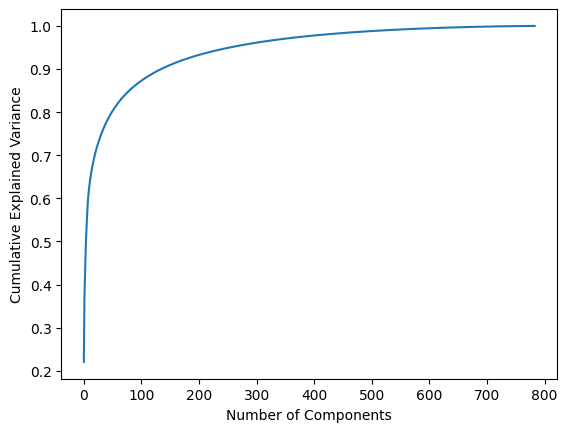

In [14]:
# Explained variance ratio
pca = PCA(n_components=None)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()